<a href="https://www.kaggle.com/code/fajemisinadeniyi/data-jobs-analysis?scriptVersionId=157904507" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data visualisation
import seaborn as sns #visualisation

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jobs-in-data/jobs_in_data.csv


## Read the data

In [2]:
df=pd.read_csv('/kaggle/input/jobs-in-data/jobs_in_data.csv')
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


## Get frequency of each year

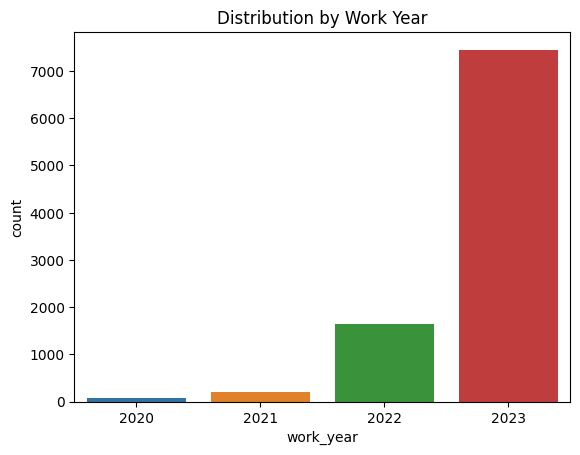

In [4]:
sns.countplot(data=df, x='work_year')
plt.title('Distribution by Work Year');

#### This shows the increase in demand for data related jobs as there has been increase year in year out with the highest demand in the year 2023 

## Get Average Salaries for each year (for consistency, salaries in usd)

In [5]:
yearly_average_salary=df[['work_year','salary_in_usd']].groupby('work_year').mean().reset_index()
yearly_average_salary

,work_year,salary_in_usd
0,2020,105878.859155
1,2021,106483.644670
2,2022,135467.501836
3,2023,155132.591708


Text(0.5, 1.0, 'Average Salaries by Year')

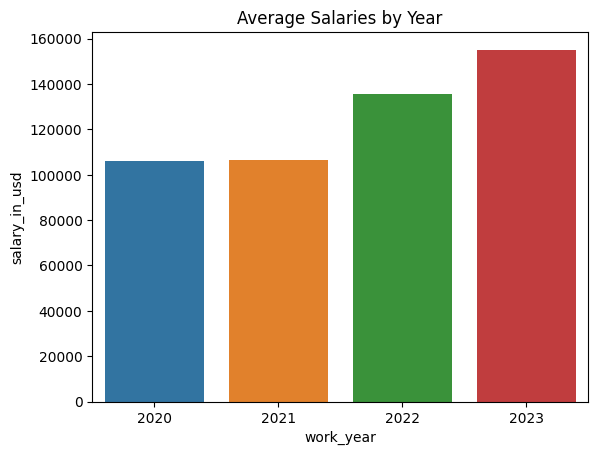

In [6]:
sns.barplot(data=yearly_average_salary, x='work_year', y='salary_in_usd')
plt.title('Average Salaries by Year')

#### Average Salary over the years has also increased, although from 2020 to 2021 wasn't much of a difference

## Get frequency of job titles

Text(0.5, 0, 'Count')

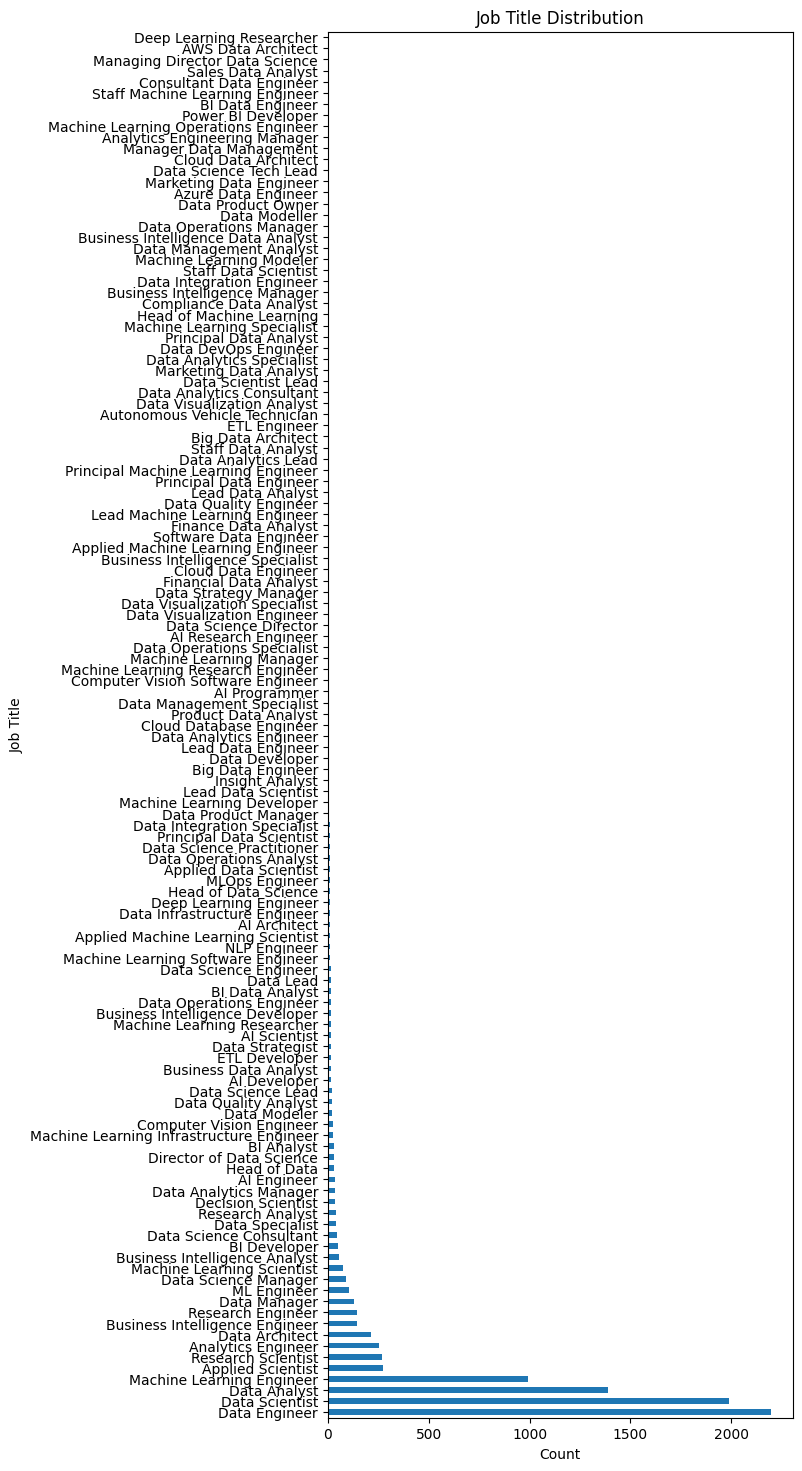

In [7]:
plt.figure(figsize=(6,18))
df['job_title'].value_counts().plot(kind='barh');
plt.title('Job Title Distribution')
plt.ylabel('Job Title')
plt.xlabel('Count')

## Get the top 10 most common data jobs

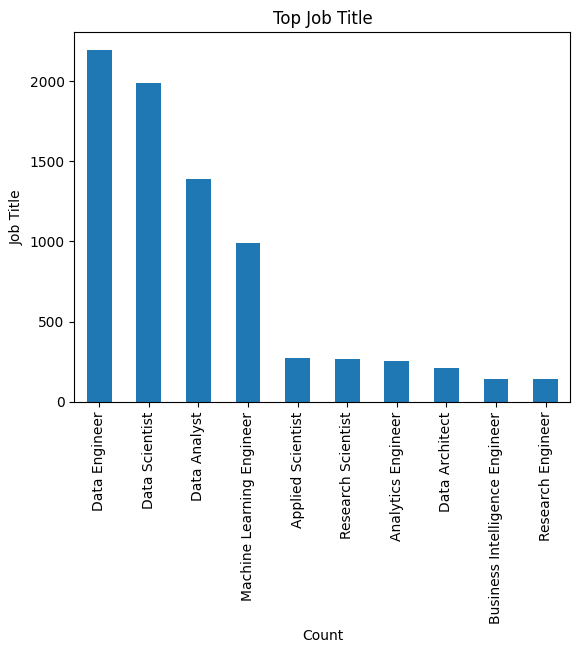

In [8]:
df['job_title'].value_counts()[:10].plot(kind='bar')
plt.title('Top Job Title')
plt.ylabel('Job Title')
plt.xlabel('Count');

In [9]:
df['job_title'].nunique() #get number of distinct job titles

125

#### There are 125 job titles, with Applied Scientist, ML Engineer, Data Analyst, Data Scientist, and Data Engineer making it to the top of the list

## Visualize average salaries by job titles and the top job_titles with highest average salaries and least average salaries

In [10]:
average_job_salary=df[['job_title','salary_in_usd']].groupby('job_title').mean().sort_values('salary_in_usd', ascending=False)
average_job_salary=average_job_salary.reset_index()
average_job_salary

,job_title,salary_in_usd
0,Analytics Engineering Manager,399880.000
1,Data Science Tech Lead,375000.000
2,Managing Director Data Science,300000.000
3,Head of Machine Learning,259000.000
4,AWS Data Architect,258000.000
...,...,...
120,Data Management Analyst,56000.000
121,Data Operations Specialist,55355.000
122,Machine Learning Specialist,55000.000
123,Insight Analyst,47673.875


Text(0.5, 1.0, 'Average Salary by Job Title')

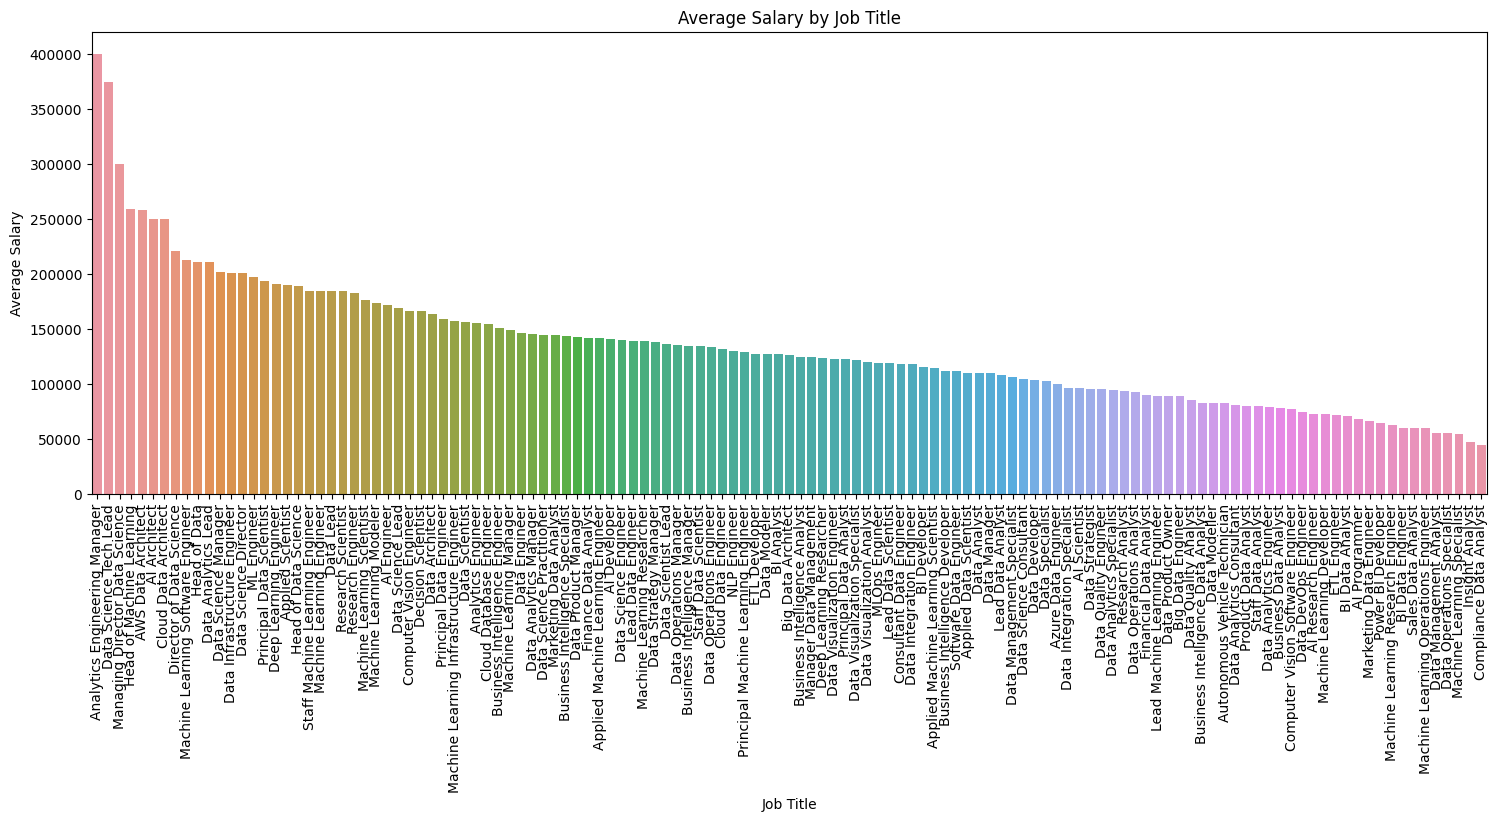

In [11]:
plt.figure(figsize=(18,6))
sns.barplot(data=average_job_salary, x='job_title', y='salary_in_usd')
plt.xticks(rotation=90)
plt.ylabel('Average Salary')
plt.xlabel('Job Title')
plt.title('Average Salary by Job Title')

Text(0.5, 1.0, 'Top 10 Job Title with Highest Average Salaries')

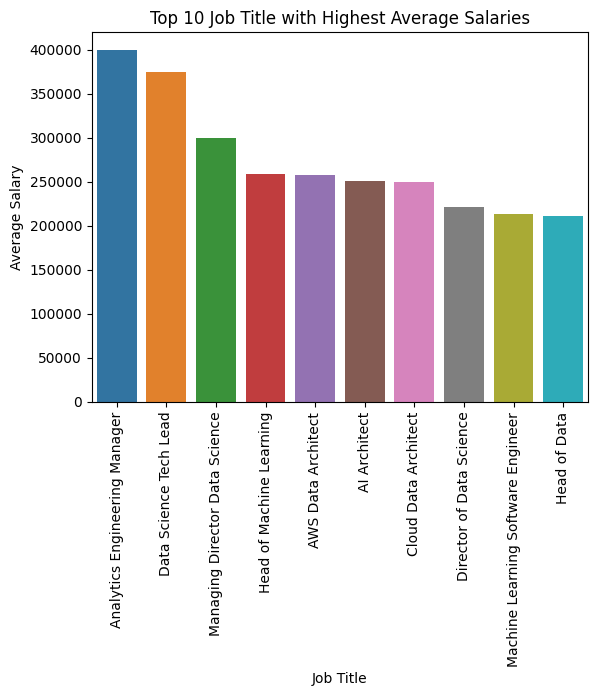

In [12]:
sns.barplot(data=average_job_salary[:10], x='job_title', y='salary_in_usd')
plt.xticks(rotation=90)
plt.ylabel('Average Salary')
plt.xlabel('Job Title')
plt.title('Top 10 Job Title with Highest Average Salaries')

#### The most paid job title on the average are Analytics Engineering Manager, Data Science Tech Lead, Managing Director Data Science, Head of Machine Learning, AWS Data Architect, AI Architect, Cloud Data Architect, Director of Data Science, Machine Learning Software Engineer, Head of Data

Text(0.5, 1.0, 'Top 10 Job Title with Lowest Average Salaries')

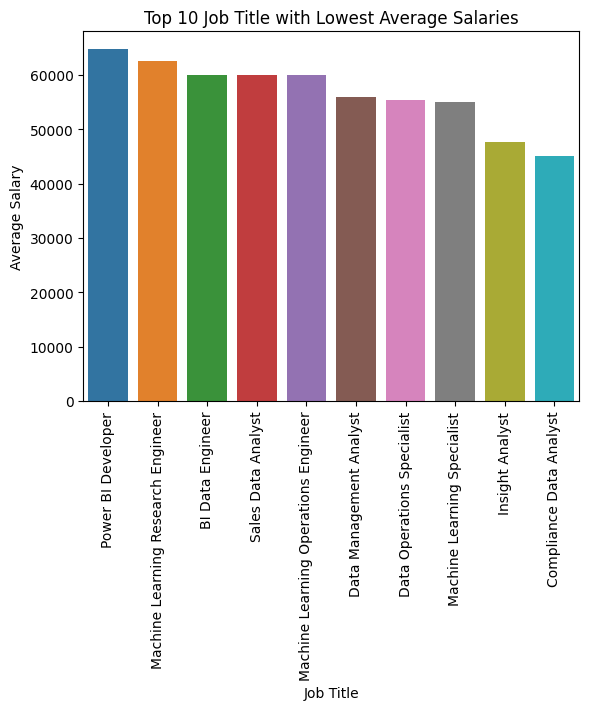

In [13]:
sns.barplot(data=average_job_salary[-10:], x='job_title', y='salary_in_usd')
plt.xticks(rotation=90)
plt.ylabel('Average Salary')
plt.xlabel('Job Title')
plt.title('Top 10 Job Title with Lowest Average Salaries')

#### The least paid job title are Power BI Developer, Machine Learning Research Engineer, BI Data Engineer, Sales Data Analyst, Machine Learning Operations Engineer, Data Management Analyst, Data Operations Specialist, Machine Learning Specialist, Insight Analyst, Compliance Data Analyst

## Visualize Average Salaries for the most common job titles


In [14]:
common_job_title=df['job_title'].value_counts().sort_values(ascending=False)[:10]

In [15]:
average_salary_common=average_job_salary[average_job_salary['job_title'].isin(common_job_title.index)].sort_values('salary_in_usd')

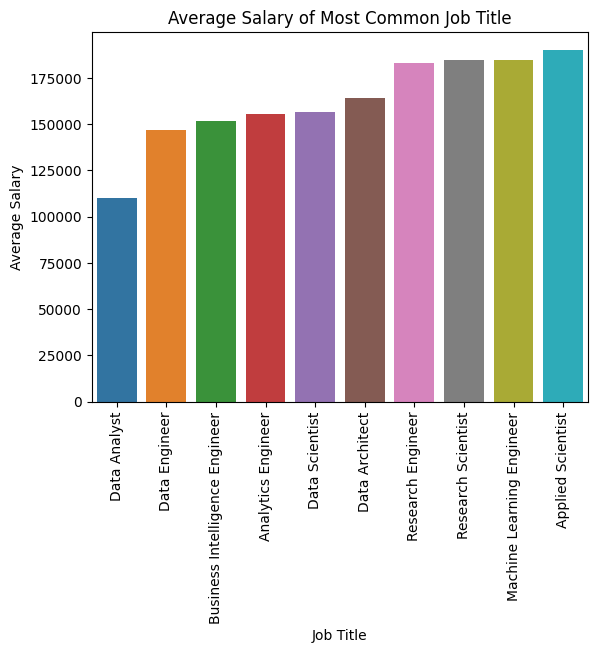

In [16]:
sns.barplot(data=average_salary_common, x='job_title', y='salary_in_usd')
plt.xticks(rotation=90)
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.title('Average Salary of Most Common Job Title');

#### The Average Salary among the most common job title ranges between 100,000 and 200,000

## Visualize distribution of job categories

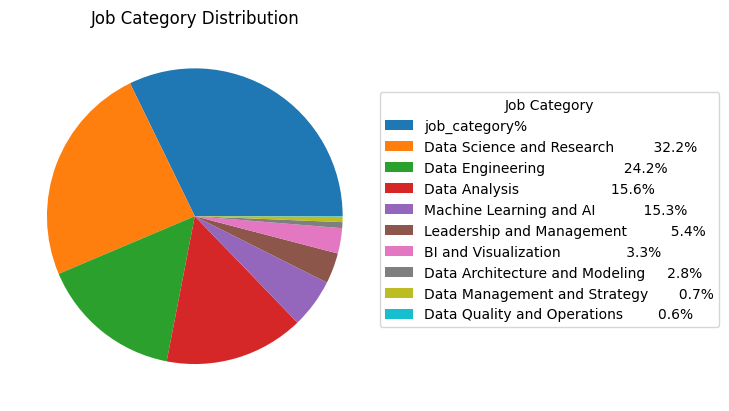

In [17]:
df.job_category.value_counts().plot(kind='pie',labels=None )
labels=str((100*df.job_category.value_counts()/df.job_category.value_counts().sum()).round(1)).replace('\n','%\n').split('\n')
plt.legend(title='Job Category', labels=labels,loc=(1,0.2))
plt.ylabel('')
plt.title('Job Category Distribution');

## Average Salaries by Job Category

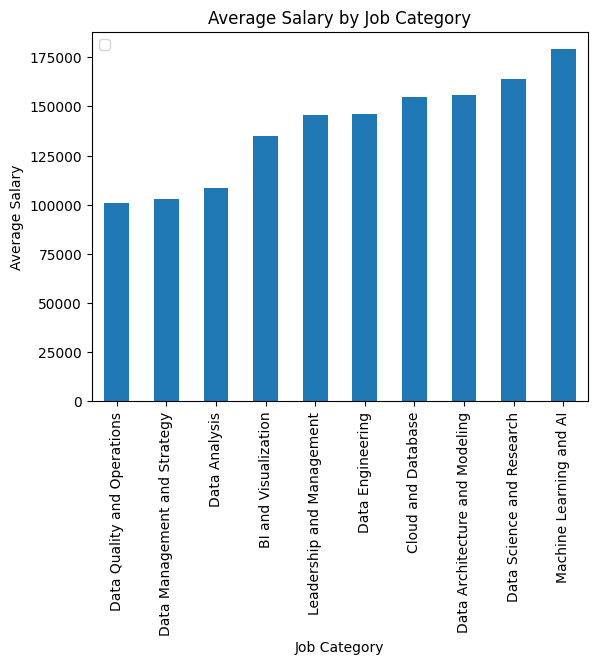

In [18]:
df[['job_category','salary_in_usd']].groupby('job_category').mean().sort_values('salary_in_usd').plot(kind='bar')
plt.title('Average Salary by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Average Salary')
plt.legend('');

#### based on job category, On an average,  Data Quality and Operations and Data Management and Strategy are paid the least marking around 100,000 while Machine learning and AI are paid the most around 175,000

## Visualize average salary in usd based on currency

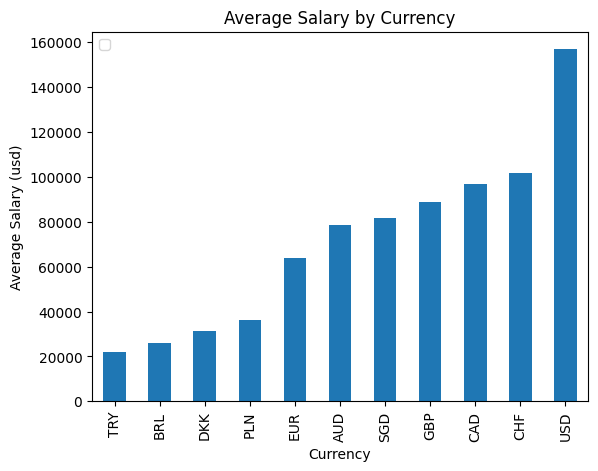

In [19]:
df[['salary_currency', 'salary_in_usd']].groupby('salary_currency').mean().sort_values('salary_in_usd').plot(kind='bar')
plt.title('Average Salary by Currency')
plt.xlabel('Currency')
plt.ylabel('Average Salary (usd)')
plt.legend('')

#### It can be implied that you are likely to earn more if you earn in USD

## Visualize average salary based on employee residence and company location

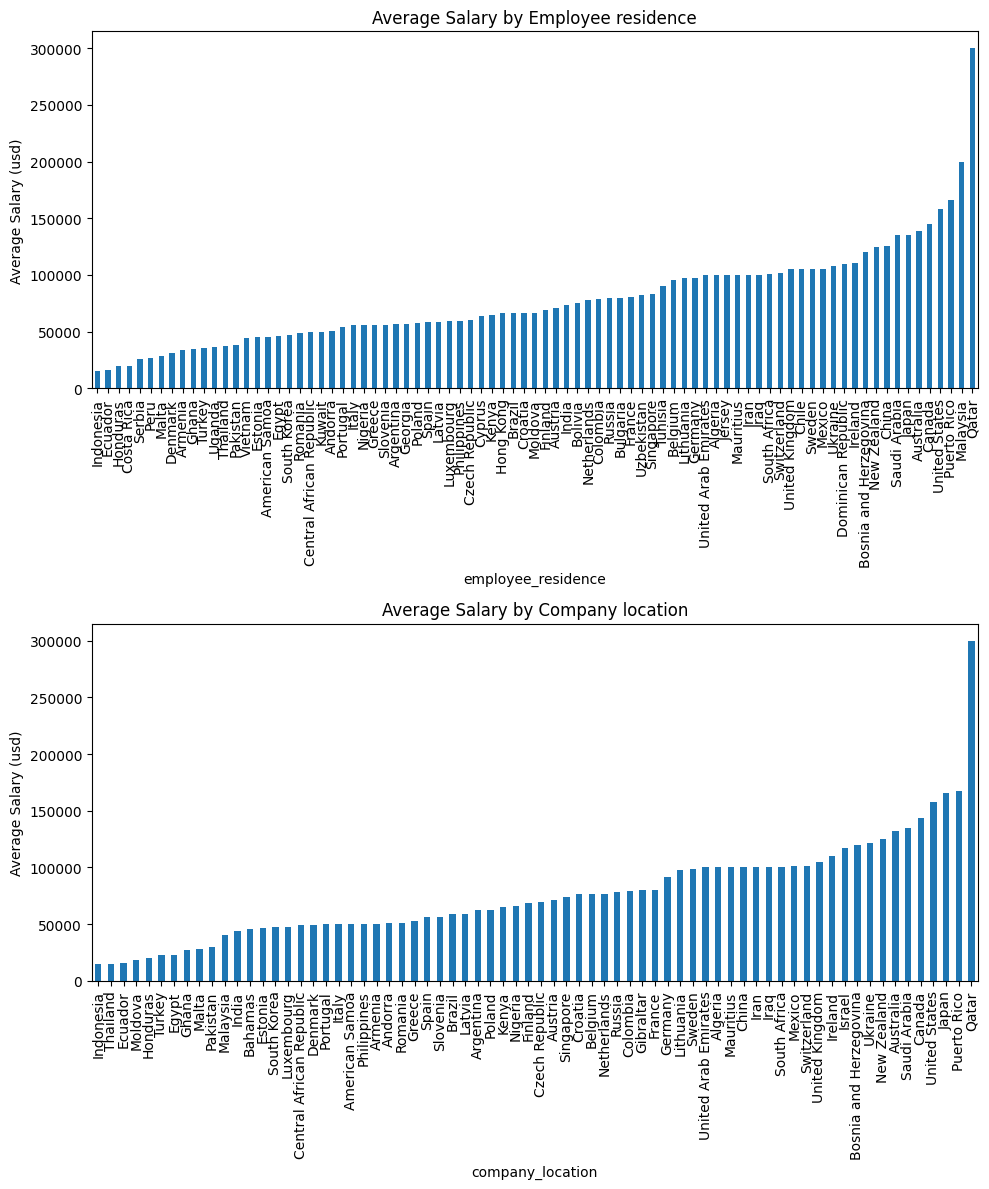

In [20]:
geographical=['employee_residence', 'company_location']
fig, ax = plt.subplots(nrows=2, figsize=(10,12))
for pos, geo in enumerate(geographical):
    df.groupby(geo)['salary_in_usd'].mean().sort_values().plot(kind='bar', ax = ax[pos])
    title= 'Average Salary by ' + geo.replace('_',' ').capitalize()
    ax[pos].set_title(title)
    ax[pos].set_ylabel('Average Salary (usd)')
    
plt.tight_layout()

#### Employees working in Qatar earn more and also Company located in Qatar pay more

## Visualize salary based on experience level

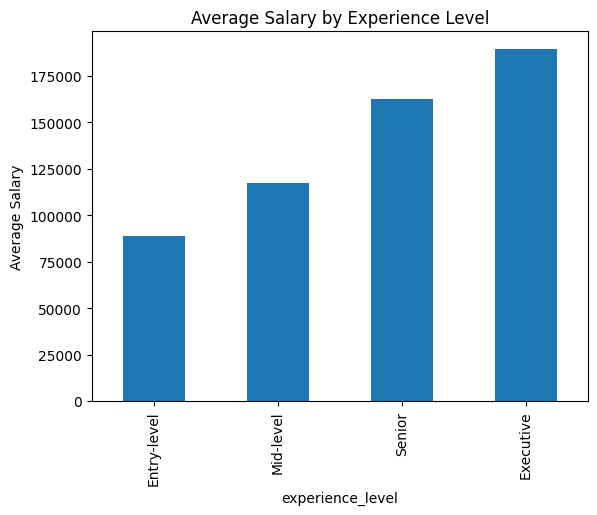

In [21]:
df.groupby('experience_level')['salary_in_usd'].mean().sort_values().plot(kind='bar')
plt.title('Average Salary by Experience Level')
plt.ylabel('Average Salary');

#### As expected, salary increases by experience level. Entry-level averaging 90,000 , Mid-level averaging 120,000 , Senior averaging 160,000 and executive averaging 190,000

## Visualize average salary based on employment type, work setting and company_size

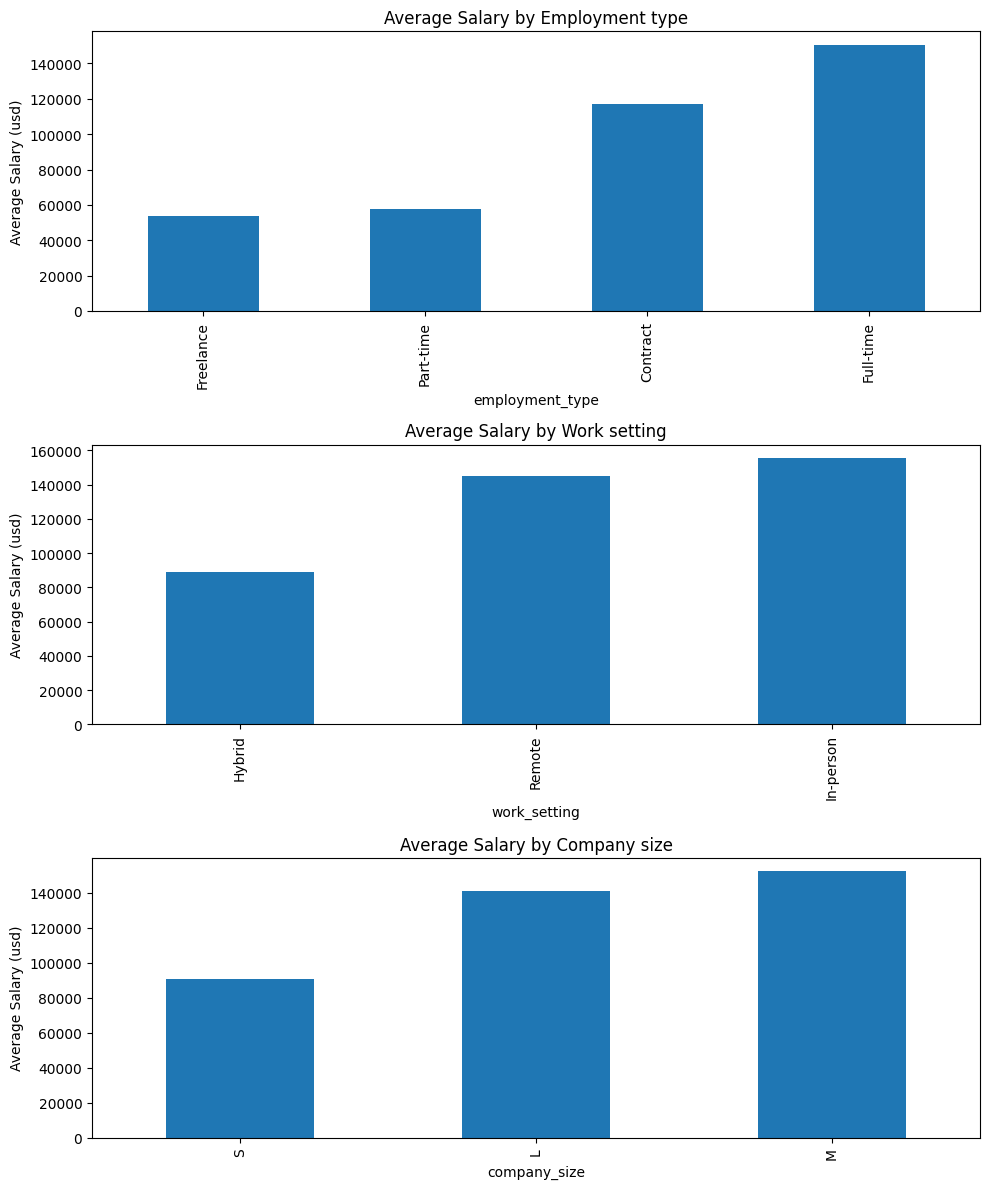

In [22]:
column=['employment_type','work_setting','company_size']
fig, ax = plt.subplots(nrows=3, figsize=(10,12))
for pos, col in enumerate(column):
    df.groupby(col)['salary_in_usd'].mean().sort_values().plot(kind='bar', ax = ax[pos])
    title= 'Average Salary by ' + col.replace('_',' ').capitalize()
    ax[pos].set_title(title)
    ax[pos].set_ylabel('Average Salary (usd)')
    
plt.tight_layout()

#### Full time workers are tend to be paid more, workers that work in an hybrid work setting are paid less, small company pay less while medium size company pay a little more than large company

## Get insights from dataset for columns with datatype of object

In [23]:
insight=df.select_dtypes('object').describe().T
insight

,count,unique,top,freq
job_title,9355,125,Data Engineer,2195
job_category,9355,10,Data Science and Research,3014
salary_currency,9355,11,USD,8591
employee_residence,9355,83,United States,8086
experience_level,9355,4,Senior,6709
employment_type,9355,4,Full-time,9310
work_setting,9355,3,In-person,5730
company_location,9355,70,United States,8132
company_size,9355,3,M,8448


In [24]:
column_to_encode=insight[insight['unique']>=10].index ##get index of column to apply label encoder

## Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()

In [27]:
for column in column_to_encode:
    df[column]=le.fit_transform(df[column])


## One-Hot Encoding

In [28]:
df=pd.get_dummies(df, drop_first=True)

<Axes: >

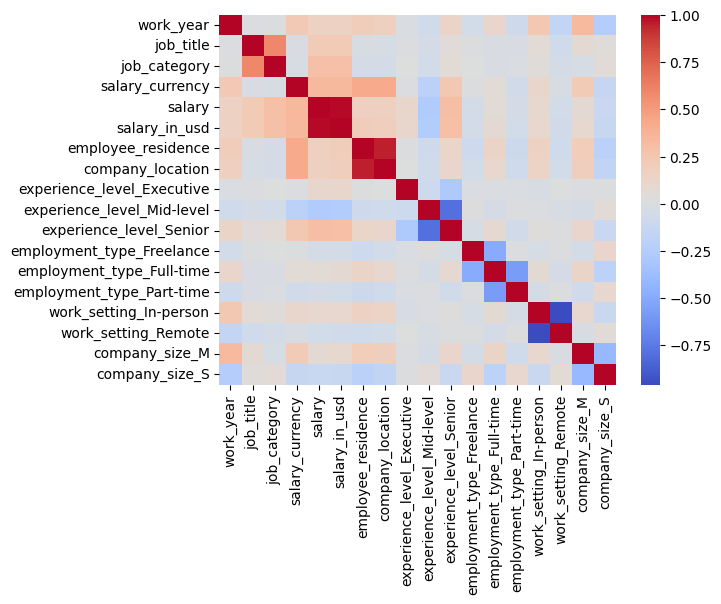

In [29]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [30]:
X=df.drop('salary_in_usd', axis=1)
y=df['salary_in_usd']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [33]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6548, 17) (6548,)
(2807, 17) (2807,)


In [34]:
from sklearn.linear_model import  LinearRegression
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [35]:
lr_model = LinearRegression()
bag_model = BaggingRegressor()
gb_model = GradientBoostingRegressor()
rf_model = RandomForestRegressor()

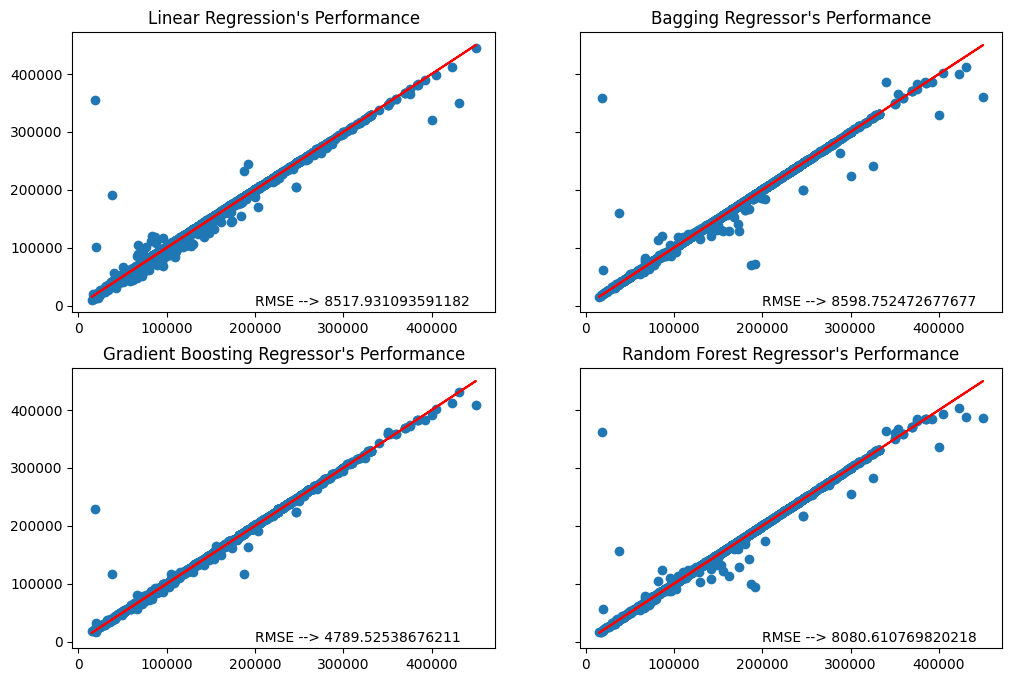

In [36]:
models=[lr_model, bag_model, gb_model, rf_model]
models_name=['Linear Regression', 'Bagging Regressor', 'Gradient Boosting Regressor', 'Random Forest Regressor']
error=[]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8), sharey=True)

for loc, model in enumerate(models):
    
    ## Fit Model and Calculate error
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    mse=mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    error.append(rmse)

    ## Visualise model performance
    axes[loc//2][loc%2].scatter(y_test, y_pred)
    axes[loc//2][loc%2].plot(y_test, y_test, c='red')
    title = models_name[loc] + '\'s Performance'
    axes[loc//2][loc%2].set_title(title)
    text = 'RMSE --> ' + str(error[loc])
    axes[loc//2][loc%2].text(x=200000, y=0, s=text)

#### Gradient boost performed best on test data